## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
df = pd.read_csv('./pitching.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [3]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  44139 non-null  object
 1   year       44139 non-null  int64 
 2   stint      44139 non-null  int64 
 3   team_id    44139 non-null  object
 4   w          44139 non-null  int64 
 5   l          44139 non-null  int64 
 6   g          44139 non-null  int64 
 7   gs         44139 non-null  int64 
 8   cg         44139 non-null  int64 
 9   sho        44139 non-null  int64 
 10  sv         44139 non-null  int64 
 11  h          44139 non-null  int64 
 12  er         44139 non-null  int64 
 13  hr         44139 non-null  int64 
 14  bb         44139 non-null  int64 
 15  so         44139 non-null  int64 
 16  bk         44139 non-null  int64 
 17  r          44139 non-null  int64 
dtypes: int64(16), object(2)
memory usage: 6.1+ MB


In [4]:
df.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [5]:
year = df.groupby('year').size()
year

year
1871     19
1872     23
1873     25
1874     17
1875     47
       ... 
2011    707
2012    722
2013    726
2014    746
2015    809
Length: 145, dtype: int64

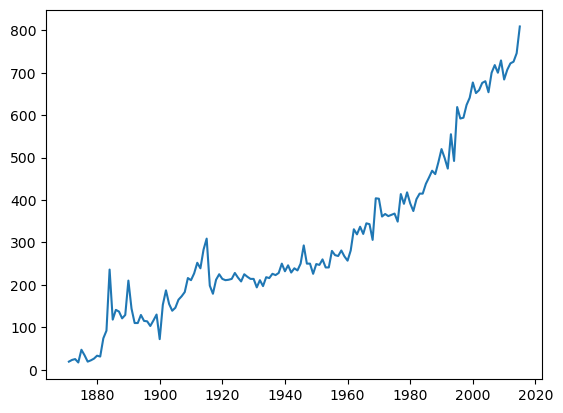

In [6]:
plt.plot(year.index, year.values)

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [7]:
df = df[df['year']>=1980]
len(df)

21157

In [8]:
df.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43


1.6 reset_index()를 통해 재배열하세요.

In [9]:
df = df.reset_index(drop=True)
df.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [10]:
df['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [11]:
df = df[df['w']!=0]
df.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
6,andujjo01,1980,1,HOU,3,8,35,14,0,0,2,132,53,8,43,75,0,59


1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [12]:
df['w'] = df['w'].apply(lambda x: 1 if x>=10 else 0)
df

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,allenne01,1980,1,NYN,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,andujjo01,1980,1,HOU,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,wrighmi01,2015,1,BAL,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,wrighst01,2015,1,BOS,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,yateski01,2015,1,TBA,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,youngch03,2015,1,KCA,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [13]:
df['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [14]:
df.drop(columns=['player_id','year','team_id'],inplace=True)
df

,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,1,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,1,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,1,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,1,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,1,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,1,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [15]:
smote = SMOTE(sampling_strategy='auto', random_state = 123)
X_train = df.drop('w',axis=1)
y_train = df['w']
X_train_over , y_train_over = smote.fit_resample(X_train,y_train)

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [16]:
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 후 값의 분포 :
 w
0    12589
1    12589
Name: count, dtype: int64


1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

- Over Sampling : 
    이상 데이터와 같이 적은 데이터 세트를 증삭하여 학습을 위한 충분한 데이터를 확보하는 방법 
    - 동일한 데이터의 단순 증식은 과적합을 유발할 수 있기 때문에 의미가 없음
        -> 원본 데이터의 피처값들을 아주 약간씩 번형하여 증식
- SMOTE : 
    데이터 불균형 해결 방법 중 적은 수의 라벨 측에 포함된 데이터 샘플 수를 늘리는 대표적인 오버 샘플링 기법 중 하나 
    - 샘플링된 데이터에 대하여 k- 최 근접 이웃을 고른 뒤, 해당 점과 이웃 점들을 선분으로 잇고 이 선분들 위에서 임의의 점을 골라 샘플로 취급하는 알고리즘

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

1. resampling :
    - 무작위로 소수 데이터 복제
    - 정보가 손실되지 않음
    - 소수 범주에 과적합이 발생할 수 있다는 단점이 있음
2. Borderline SMOTE:
    - Borderline 부분에서만 SMOTE 방식 사용
    - Borderline 찾기 : 임의의 소수 범주의 데이터 하나에 대해 주변의 k개 데이터를 탐색
         -> 그 중 다수 범주 데이터 수를 확인
3. ADASYN :
    - 2번 방법과 비슷하나 샘플링 개수를 데이터 위치에 따라 다르게 설정
    - 모든 소수 범주 데이터에 대해 주변의 k개의 데이터를 탐색
    - 다수 범주 데이터의 비율 계산

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(9793, 14) (2449, 14) (3061, 14)
(9793,) (2449,) (3061,)


2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

- validation set : 학습이 이미 완료된 모델을 검증하기 위한 set (중간 점검)
    - validation set은 모델 성능 검증용으로 중간에 사용되는 데이터셋이므로 학습에 일정 부분 관여
- test set : 학습과 검증이 끝난 모델의 최종 성능 평가용


2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [18]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, scoring='accuracy',random_state=42)

In [20]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [21]:
print("최적의 파라미터:", random_search.best_params_)
y_pred_val = random_search.best_estimator_.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation 데이터에서의 정확도:", accuracy_val)

최적의 파라미터: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Validation 데이터에서의 정확도: 0.939975500204165


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

- n_estimators: 결정트리 개수
- max_depth : 최대 깊이 제한
- min_sample_split : 노드를 분할하기 위한 최소 샘플 수
- min_sample_leaf : 리프 노드가 되기 위해 칠요한 최소 샘플 수 
- bootstrap : 샘플 무작위 선택 여부 결정
- criterion : 노드 분할 결정 기준 

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [24]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("최적의 파라미터:", grid_search.best_params_)
y_pred_test = grid_search.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test 데이터에서의 정확도:", accuracy_test)

최적의 파라미터: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Test 데이터에서의 정확도: 0.9376020908199935


2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

- RandomizedSearchCV는 GridSearch에 비해 시간 상 효율적이다. 데이터가 많고 파라미터 튜닝이 많이 필요할 때 효과적
- GridSearchCV는 데이터가 많고, 튜닝해야 할 파라미터가 많은 경우 비효율적이다. 성능 개선을 위해 모든 파라미터 조합을 진행해야할 때 사용하는 것이 적절

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [27]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [30]:
from skopt import BayesSearchCV

rf = RandomForestClassifier()
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_grid, n_iter=50, scoring='accuracy', cv=5, random_state=42)
bayes_search.fit(X_train, y_train)
print("최적의 파라미터:", bayes_search.best_params_)
y_pred_test = bayes_search.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test 데이터에서의 정확도:", accuracy_test)

최적의 파라미터: OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 20), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 100)])
Test 데이터에서의 정확도: 0.9376020908199935


2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [31]:
random_param = random_search.best_estimator_
grid_param = grid_search.best_estimator_
bayes_param = bayes_search.best_estimator_

best_random = random_search.predict(X_test)
best_grid = grid_search.predict(X_test)
best_bayes = bayes_search.predict(X_test)

In [32]:
print(f"random_search: {accuracy_score(y_test, best_random)}")
print(f"grid_search: {accuracy_score(y_test, best_grid)}")
print(f"bayes_search: {accuracy_score(y_test, best_bayes)}")

random_search: 0.9415223783077425
grid_search: 0.9376020908199935
bayes_search: 0.9376020908199935
